In [1]:
import re
import pandas as pd
import numpy as np
import dropbox
import json
from pprint import pprint
from StringIO import StringIO
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

%matplotlib inline

In [2]:
# Set results filename here!
filename = "ann_model_selector_results_2016-07-13 22:35:48.479109.csv"
# filename = "ann_model_selector_results_2016-07-13 04:27:00.800318.csv"
# filename = "ann_model_selector_results_2016-07-04 04:13:01.191864.csv"

# Initialize the Dropbox client
client = dropbox.client.DropboxClient('qECz4Lio64gAAAAAAAADKCBiIafW0-teoaxb7jaNJVjcn517S7mH0l7rwjZXbThX')

# Download configuration file from Dropbox
print('Downloading results file...')
f, metadata = client.get_file_and_metadata('results/' + filename)
print('Results file downloaded!')
print

# Import data
data_url = StringIO(f.read())
data = pd.read_csv(data_url)
# pprint(raw_data)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: You are using a deprecated client. Please use the new v2 client located at dropbox.Dropbox.


Results file downloaded!



/usr/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


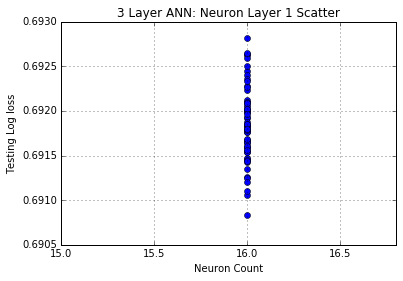

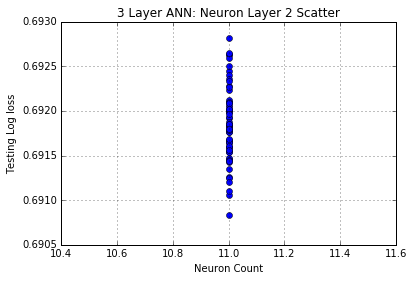

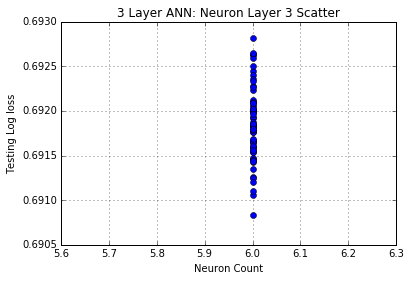

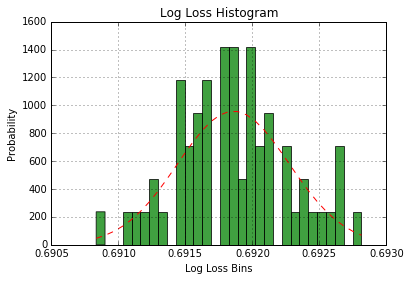


Top 30 log loss
      dropout_rates  num_neurons  testing_log_loss
63  [0.5, 0.5, 0.5]  [16, 11, 6]          0.690834
59  [0.5, 0.4, 0.5]  [16, 11, 6]          0.691056
62  [0.5, 0.5, 0.4]  [16, 11, 6]          0.691108
55  [0.5, 0.3, 0.5]  [16, 11, 6]          0.691202
47  [0.4, 0.5, 0.5]  [16, 11, 6]          0.691246
43  [0.4, 0.4, 0.5]  [16, 11, 6]          0.691263
61  [0.5, 0.5, 0.3]  [16, 11, 6]          0.691348
42  [0.4, 0.4, 0.4]  [16, 11, 6]          0.691432
58  [0.5, 0.4, 0.4]  [16, 11, 6]          0.691437
57  [0.5, 0.4, 0.3]  [16, 11, 6]          0.691447
46  [0.4, 0.5, 0.4]  [16, 11, 6]          0.691463
53  [0.5, 0.3, 0.3]  [16, 11, 6]          0.691474
31  [0.3, 0.5, 0.5]  [16, 11, 6]          0.691535
45  [0.4, 0.5, 0.3]  [16, 11, 6]          0.691540
54  [0.5, 0.3, 0.4]  [16, 11, 6]          0.691559
27  [0.3, 0.4, 0.5]  [16, 11, 6]          0.691567
26  [0.3, 0.4, 0.4]  [16, 11, 6]          0.691595
38  [0.4, 0.3, 0.4]  [16, 11, 6]          0.691598
41  [0.4, 0.4,

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:91: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [5]:
layer_counts = np.sort(data['num_layers'].unique())
num_results = len(data)

# Prepare plots based on layer counts
m = 0
for i in layer_counts:
    layer_data = data[data['num_layers'] == i]
    
#     # Plot dropout rates vs accuracies
#     for j in xrange(i):
#         x = np.ndarray(num_results)
#         y = np.ndarray(num_results)
        
#         # Extract the dropout rates pertaining to this layer
#         for k in xrange(num_results):
#             values = re.sub('[\[\] ]', '', layer_data['dropout_rates'][k]).split(',')
#             x[k] = float(values[j])
#             y[k] = data['testing_log_loss'][k]
        
#         # Plot
#         plt.figure(m)
#         plt.title('%d Layer ANN: Dropout Layer %d' % (i, j+1))
#         plt.ylabel('Testing Log loss')
#         plt.xlabel('Dropout Rate')
#         plt.grid(True)
#         plt.boxplot(y, labels=np.unique(x))

#         m += 1

    # Plot neuron counts vs accuracies
    neuron_data = np.ndarray((i, num_results, 2))
    for j in xrange(i):
        # Extract the neuron counts pertaining to this layer
        for k in xrange(num_results):
            values = re.sub('[\[\] ]', '', layer_data['num_neurons'][k]).split(',')
            neuron_data[j,k,0] = float(values[j])
            neuron_data[j,k,1] = data['testing_log_loss'][k]
    
        # Create scatter plot
        plt.figure(m)
        plt.title('%d Layer ANN: Neuron Layer %d Scatter' % (i, j+1))
        plt.ylabel('Testing Log loss')
        plt.xlabel('Neuron Count')
        plt.grid(True)
        plt.plot(neuron_data[j,:,0], neuron_data[j,:,1], "o")

        # Calculate the trendline for scatter plot
        z = np.polyfit(neuron_data[j,:,0], neuron_data[j,:,1], 1)
        p = np.poly1d(z)
        plt.plot(neuron_data[j,:,0], p(neuron_data[j,:,0]), "r--")

        m += 1

    # Create histogram
    plt.figure(m)
    n, bins, patches = plt.hist(neuron_data[0,:,1], 30, normed=True, facecolor='green', alpha=0.75)

    # Add a 'best fit' line
    mu = np.mean(neuron_data[0,:,1])
    sigma = np.std(neuron_data[0,:,1])
    plt.xlabel('Log Loss Bins')
    plt.ylabel('Probability')
    plt.title('Log Loss Histogram')
    plt.grid(True)
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--', linewidth=1)

    m += 1
    
    # For multi hidden layer ANNs, compare neuron counts
    if(i == 2):
        # Plot
        fig = plt.figure(m, figsize=(8,6), dpi=80)
        ax = fig.gca(projection='3d')
        ax.set_title('2 Layer ANN: Neuron Layer Comparison')
        ax.set_xlabel('Neuron Layer 1 Count')
        ax.set_ylabel('Neuron Layer 2 Count')
        ax.set_zlabel('Log Loss')
        ax.plot_trisurf(neuron_data[0,:,0], neuron_data[1,:,0], neuron_data[0,:,1], cmap=cm.jet)
    
        m += 1

    plt.show()
    
#   # Sort for best results
#     best_log_loss = layer_data.sort(['testing_log_loss'])[:num_samples][['dropout_rates', 'num_neurons', 'testing_log_loss']]
#     best_accuracy = layer_data.sort(['testing_accuracy'])[:num_samples][['dropout_rates', 'num_neurons', 'testing_accuracy']]
    
    # Show top N results
    num_samples = 30
    best_log_loss = layer_data.sort(['testing_log_loss'])[:num_samples][['dropout_rates', 'num_neurons', 'testing_log_loss']]
    print
    print('Top %d log loss' % num_samples)
    pprint(best_log_loss)
    print
#     print('Top %d accuracy' % num_samples)
#     pprint(best_accuracy)
#     print
    
    # Show some stats
#     print('    Min / Max:  %f / %f' % (min(best_log_loss), max(best_log_loss)))
    print('    Mean:       %f' % best_log_loss.mean())
    print('    Std Dev::   %f' % best_log_loss.std())